# TP : La Segmentation bayésienne
rendu le 23 octobre

## I) Une première idée des enjeux du problème

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd


In [2]:
def bruit_gauss2(X, cl1, cl2, m1, sig1, m2, sig2):
    Y = np.copy(X)
    Y[X == cl1] = np.random.normal(m1, sig1, np.sum(X == cl1))
    Y[X == cl2] = np.random.normal(m2, sig2, np.sum(X == cl2))
    return Y

In [3]:
def classif_gauss2(Y, cl1, cl2, m1, sig1, m2, sig2):
    S = np.zeros_like(Y)
    prob1 = norm.pdf(Y, loc=m1, scale=sig1)
    prob2 = norm.pdf(Y, loc=m2, scale=sig2)
    S[prob1 <= prob2] = cl2
    S[prob1 >= prob2] = cl1
    return S

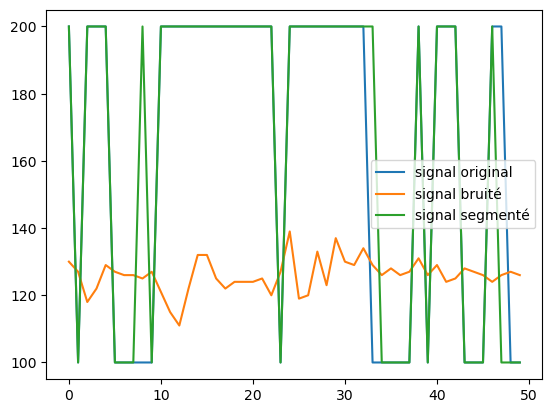

In [7]:
X = np.load("signaux/signal.npy")
counts, _ = np.histogram(X, bins=int(X.max()+1), range=(0,int(X.max())))
cl1, cl2 = np.nonzero(counts)[0]
## Ces 3 lignes peuvent être remplacés par cl1, cl2 = np.unique(X)

m1=127
m2=127
sig1= 1
sig2= 5

Y = bruit_gauss2(X, cl1, cl2, m1, sig1, m2, sig2)
S = classif_gauss2(Y, cl1, cl2, m1, sig1, m2, sig2)
    
plt.plot(X, label="signal original")
plt.plot(Y, label="signal bruité")
plt.plot(S, label="signal segmenté")
plt.legend()
plt.show()

### <span style="color:green"> COMMENTAIRE À FAIRE !!

In [8]:
def taux_erreur(A,B):
    tau = np.sum(A!=B)/len(A)
    return tau

In [18]:
print("Taux d'erreur :", taux_erreur(X,S))

Taux d'erreur : 0.06


Text(0, 0.5, 'Taux derreur')

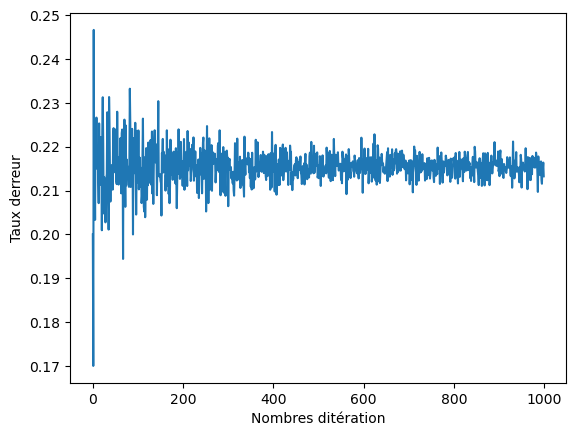

In [20]:
T = 1000 # grand -> nbre d'itérations
X = np.load("signaux/signal.npy")
cl1, cl2 = np.unique(X)

def Erreur_moyenne(T,X):
    erreur_moyenne = np.zeros(T)
    for j in range(T):
        erreur = np.zeros(j+1)
        for t in range(j+1):
            Y = bruit_gauss2(X, cl1, cl2, m1, sig1, m2, sig2)
            S = classif_gauss2(Y, cl1, cl2, m1, sig1, m2, sig2)
            erreur[t] = taux_erreur(S,X)
        erreur_moyenne[j] = np.mean(erreur)
    return erreur_moyenne

plt.plot(Erreur_moyenne(T,X))
plt.xlabel('Nombres d''itération')
plt.ylabel('Taux d''erreur')

In [21]:
np.mean(Erreur_moyenne(T,X))

0.21537134704362187

### <span style="color:green"> COMMENTAIRE À FINIR !!

#### b. Lorsque T devient très grand, l'erreur moyenne tend à converger vers une valeur constante. Cela signifie que l'erreur moyenne devient stable et prévisible à mesure que le nombre d'itérations augmente.

#### c. Ce phénomène s'explique par la loi des grands nombres, qui stipule que la moyenne d'un grand nombre d'échantillons d'une variable aléatoire convergera vers l'espérance mathématique (moyenne) de cette variable aléatoire. En d'autres termes, à mesure que T devient très grand, l'erreur moyenne converge vers la véritable erreur de segmentation du système.

#### d. L'erreur moyenne qui converge vers une valeur constante lorsque T devient très grand indique que cette valeur constante représente une mesure stable de l'erreur de segmentation du système sous l'influence du bruit. En d'autres termes, il s'agit d'une estimation fiable de l'erreur de segmentation attendue dans un environnement où le bruit est présent. Plus T est grand, plus cette estimation est précise. Cela permet de quantifier l'impact du bruit sur la performance de la segmentation.

In [22]:
# Taille des signaux
signaux = ["signaux/signal.npy", "signaux/signal1.npy", "signaux/signal2.npy", "signaux/signal3.npy", "signaux/signal4.npy", "signaux/signal5.npy"]
for signal in signaux:
    X = np.load(signal)
    print(signal, len(X))

signaux/signal.npy 50
signaux/signal1.npy 250
signaux/signal2.npy 50000
signaux/signal3.npy 50000
signaux/signal4.npy 50000
signaux/signal5.npy 50000


#### Il est inutile de moyenner l'ereur sur un grand nombre T pour les signaux de grandes tailles car le traitements se fait point par point ils sont donc considérer comme indépendants.

In [35]:
signaux = [("signaux/signal.npy", 700), ("signaux/signal1.npy", 700), ("signaux/signal2.npy", 1), ("signaux/signal3.npy", 1), ("signaux/signal4.npy", 1), ("signaux/signal5.npy", 1)]

parametres_bruit = [
    (120, 130, 1, 2),
    (127, 127, 1, 5),
    (127, 128, 1, 1),
    (127, 128, 0.1, 0.1),
    (127, 128, 2, 3)]

resultats = []
for (signal, T) in signaux:
    X = np.load(signal)
    cl1, cl2 = np.unique(X)
    for m1, m2, sig1, sig2 in parametres_bruit:
        Y = bruit_gauss2(X, cl1, cl2, m1, sig1, m2, sig2)
        S = classif_gauss2(Y, cl1, cl2, m1, sig1, m2, sig2)
        taux_err = np.mean(Erreur_moyenne(T,X))
        resultats.append((signal, m1, m2, sig1, sig2, taux_err))

In [36]:
Signal = ["0"]*5+["1"]*5+["2"]*5+["3"]*5+["4"]*5+["5"]*5
m1 = [resultats[i][1] for i in range(5*6)]
m2 = [resultats[i][2] for i in range(5*6)]
sig1 = [resultats[i][3] for i in range(5*6)]
sig2 = [resultats[i][4] for i in range(5*6)]
taux_err = [resultats[i][5] for i in range(5*6)]

mydict = {"Signal":Signal,"m1":m1, "m2":m2, "sig1":sig1, "sig2":sig2, "taux_err":taux_err}
mydata = pd.DataFrame(mydict, columns=["Signal","m1","m2","sig1","sig2","taux_err"])
print(mydata)

   Signal   m1   m2  sig1  sig2  taux_err
0       0  120  130   1.0   2.0  0.000852
1       0  127  127   1.0   5.0  0.215343
2       0  127  128   1.0   1.0  0.377470
3       0  127  128   0.1   0.1  0.320157
4       0  127  128   2.0   3.0  0.426297
5       1  120  130   1.0   2.0  0.253965
6       1  127  127   1.0   5.0  0.344159
7       1  127  128   1.0   1.0  0.332072
8       1  127  128   0.1   0.1  0.254064
9       1  127  128   2.0   3.0  0.398454
10      2  120  130   1.0   2.0  0.249660
11      2  127  127   1.0   5.0  0.340000
12      2  127  128   1.0   1.0  0.328900
13      2  127  128   0.1   0.1  0.249240
14      2  127  128   2.0   3.0  0.395120
15      3  120  130   1.0   2.0  0.253000
16      3  127  127   1.0   5.0  0.337260
17      3  127  128   1.0   1.0  0.327600
18      3  127  128   0.1   0.1  0.252000
19      3  127  128   2.0   3.0  0.396760
20      4  120  130   1.0   2.0  0.249080
21      4  127  127   1.0   5.0  0.337900
22      4  127  128   1.0   1.0  0

### Un fort ou un faible niveau de bruit peut être déterminé en examinant les taux d'erreur de segmentation. Voici quelques observations à partir des résultats obtenus :

1. Fort niveau de bruit : Les taux d'erreur de segmentation sont plus élevés lorsque les valeurs de `sig1` et `sig2` (écarts types des gaussiennes) sont plus élevées. Cela suggère que des niveaux de bruit plus élevés rendent la segmentation plus difficile, car la variabilité dans les données bruitées est plus importante.

2. Faible niveau de bruit : Les taux d'erreur de segmentation sont plus faibles lorsque les valeurs de `m1` et `m2` (moyennes des gaussiennes) sont plus élevées. Cela indique que des signaux originaux plus distincts sont plus faciles à segmenter, car les deux classes sont plus séparées.

3. Signaux distincts : En général, pour une bonne segmentation, il est souhaitable d'avoir des signaux originaux distincts avec un faible niveau de bruit. Cela se traduit par des valeurs plus élevées de `m1`, `m2` (moyennes des gaussiennes) et des valeurs plus faibles de `sig1`, `sig2` (écarts types des gaussiennes), ce qui permet d'obtenir des taux d'erreur de segmentation plus bas.


En résumé, un fort niveau de bruit se traduit par des taux d'erreur de segmentation plus élevés, tandis qu'un faible niveau de bruit et des signaux originaux distincts conduisent à de meilleurs taux d'erreur de segmentation. Le choix du niveau de bruit approprié dépend des caractéristiques des signaux et des objectifs de la segmentation.

## II) Apport des méthodes bayésiennes de segmentation

In [39]:
def calc_probaprio2(X,cl1,cl2):
    p1 = np.mean(X == cl1)
    p2 = np.mean(X == cl2)
    return p1, p2

In [40]:
def MAP_MPM2(Y,cl1,cl2,p1,p2,m1,sig1,m2,sig2):
    p_1 = p1 * norm.pdf(Y, loc=m1, scale=sig1)
    p_2 = p2 * norm.pdf(Y, loc=m2, scale=sig2)
    S = np.where(p_1 >= p_2, cl1, cl2)
    return S

In [41]:
signaux = [("signaux/signal.npy", 700), ("signaux/signal1.npy", 700), ("signaux/signal2.npy", 1), ("signaux/signal3.npy", 1), ("signaux/signal4.npy", 1), ("signaux/signal5.npy", 1)]

parametres_bruit = [
    (120, 130, 1, 2),
    (127, 127, 1, 5),
    (127, 128, 1, 1),
    (127, 128, 0.1, 0.1),
    (127, 128, 2, 3)]

resultats_MAP_MPM2 = []
for (signal, T) in signaux:
    X = np.load(signal)
    cl1, cl2 = np.unique(X)
    for m1, m2, sig1, sig2 in parametres_bruit:
        Y = bruit_gauss2(X, cl1, cl2, m1, sig1, m2, sig2)
        p1, p2 = calc_probaprio2(X,cl1,cl2)
        S = MAP_MPM2(Y,cl1,cl2,p1,p2,m1,sig1,m2,sig2)
        taux_err = np.mean(Erreur_moyenne(T,X))
        resultats_MAP_MPM2.append((signal, m1, m2, sig1, sig2, taux_err))

[('signaux/signal.npy', 120, 130, 1, 2, 0.0008692836171104178),
 ('signaux/signal.npy', 127, 127, 1, 5, 0.21540103868938032),
 ('signaux/signal.npy', 127, 128, 1, 1, 0.37700187391179757),
 ('signaux/signal.npy', 127, 128, 0.1, 0.1, 0.3197809357900045),
 ('signaux/signal.npy', 127, 128, 2, 3, 0.4262286530621071),
 ('signaux/signal1.npy', 120, 130, 1, 2, 0.254150222542941),
 ('signaux/signal1.npy', 127, 127, 1, 5, 0.34424918790378933),
 ('signaux/signal1.npy', 127, 128, 1, 1, 0.33212839979663905),
 ('signaux/signal1.npy', 127, 128, 0.1, 0.1, 0.253854851315151),
 ('signaux/signal1.npy', 127, 128, 2, 3, 0.3984241522306778),
 ('signaux/signal2.npy', 120, 130, 1, 2, 0.2519),
 ('signaux/signal2.npy', 127, 127, 1, 5, 0.33662),
 ('signaux/signal2.npy', 127, 128, 1, 1, 0.32964),
 ('signaux/signal2.npy', 127, 128, 0.1, 0.1, 0.24894),
 ('signaux/signal2.npy', 127, 128, 2, 3, 0.39364),
 ('signaux/signal3.npy', 120, 130, 1, 2, 0.25108),
 ('signaux/signal3.npy', 127, 127, 1, 5, 0.33954),
 ('signaux/s

In [56]:
Signal = ["0"]*5+["1"]*5+["2"]*5+["3"]*5+["4"]*5+["5"]*5
m1 = [resultats_MAP_MPM2[i][1] for i in range(5*6)]
m2 = [resultats_MAP_MPM2[i][2] for i in range(5*6)]
sig1 = [resultats_MAP_MPM2[i][3] for i in range(5*6)]
sig2 = [resultats_MAP_MPM2[i][4] for i in range(5*6)]
taux_err_MAP_MPM2 = [resultats_MAP_MPM2[i][5] for i in range(5*6)]
taux_err = [resultats[i][5] for i in range(5*6)]

mydict = {"Signal":Signal,"m1":m1, "m2":m2, "sig1":sig1, "sig2":sig2, "taux_err_MAP_MPM2":taux_err_MAP_MPM2, "taux_err_Gauss2":taux_err}
mydata = pd.DataFrame(mydict, columns=["Signal","m1","m2","sig1","sig2","taux_err_MAP_MPM2", "taux_err_Gauss2"])
print(mydata)

   Signal   m1   m2  sig1  sig2  taux_err_MAP_MPM2  taux_err_Gauss2
0       0  120  130   1.0   2.0           0.000869         0.000852
1       0  127  127   1.0   5.0           0.215401         0.215343
2       0  127  128   1.0   1.0           0.377002         0.377470
3       0  127  128   0.1   0.1           0.319781         0.320157
4       0  127  128   2.0   3.0           0.426229         0.426297
5       1  120  130   1.0   2.0           0.254150         0.253965
6       1  127  127   1.0   5.0           0.344249         0.344159
7       1  127  128   1.0   1.0           0.332128         0.332072
8       1  127  128   0.1   0.1           0.253855         0.254064
9       1  127  128   2.0   3.0           0.398424         0.398454
10      2  120  130   1.0   2.0           0.251900         0.249660
11      2  127  127   1.0   5.0           0.336620         0.340000
12      2  127  128   1.0   1.0           0.329640         0.328900
13      2  127  128   0.1   0.1           0.2489

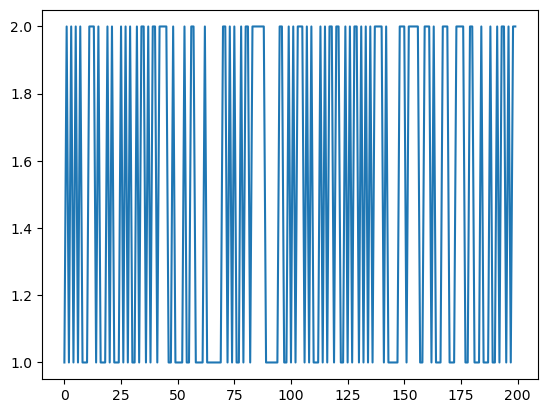

In [65]:
def simul2(n, cl1, cl2, p1):
    p2 = 1 - p1
    X_simu = np.random.choice([cl1, cl2], size=n, p=[p1, p2])
    return X_simu

X_simu = simul2(200, 1, 2, .5)
plt.plot(X_simu)

In [31]:
calc_probaprio2(X_simu, cl1, cl2)

(0.56, 0.44)

In [68]:
# Liste des valeurs de p1 à tester
p1_values = [0.1, 0.3, 0.5, 0.7, 0.9]
n=50000
cl1 = 1
cl2 = 2

# Liste des paramètres de bruit de la question I.4
parametres_bruit = [
    (120, 130, 1, 2),
    (127, 127, 1, 5),
    (127, 128, 1, 1),
    (127, 128, 0.1, 0.1),
    (127, 128, 2, 3)
]

# Stockage des résultats
resultats_simulations = []

for m1, m2, sig1, sig2 in parametres_bruit:
    for p1 in p1_values:
        erreurs_map_mpm2 = []
        erreurs_Gauss2 = []

        for _ in range(200):  # Répétez la simulation plusieurs fois pour chaque combinaison
            X_simule = simul2(n, cl1, cl2, p1)
            #p2_simule = 1 - p1  # Calculer p2

            p1_simule, p2_simule = calc_probaprio2(X_simule, cl1, cl2)

            # Segmentez en utilisant la méthode MAP/MPM
            Y = bruit_gauss2(X_simule, cl1, cl2, m1, sig1, m2, sig2)
            S_map_mpm2 = MAP_MPM2(Y, cl1, cl2, p1_simule, p2_simule, m1, sig1, m2, sig2)
            taux_err_map_mpm2 = taux_erreur(S_map_mpm2, X_simule)
            erreurs_map_mpm2.append(taux_err_map_mpm2)

            # Segmentez en utilisant la méthode de Gauss
            Y = bruit_gauss2(X_simule, cl1, cl2, m1, sig1, m2, sig2)
            S_Gauss2 = classif_gauss2(Y, cl1, cl2, m1, sig1, m2, sig2)
            taux_err_Gauss2 = taux_erreur(S_Gauss2, X_simule)
            erreurs_Gauss2.append(taux_err_Gauss2)

        erreur_moyenne_map_mpm2 = np.mean(erreurs_map_mpm2)
        erreur_moyenne_Gauss2 = np.mean(erreurs_Gauss2)

        resultats_simulations.append((p1, m1, m2, sig1, sig2, erreur_moyenne_map_mpm2, erreur_moyenne_Gauss2))


mydata = pd.DataFrame(resultats_simulations, columns=["p1", "m1", "m2", "sig1", "sig2", "Tau(MAP/MPM)", "Tau(Gauss2)"])
print(mydata)

     p1   m1   m2  sig1  sig2  Tau(MAP/MPM)  Tau(Gauss2)
0   0.1  120  130   1.0   2.0      0.001212     0.001213
1   0.3  120  130   1.0   2.0      0.000965     0.000936
2   0.5  120  130   1.0   2.0      0.000695     0.000690
3   0.7  120  130   1.0   2.0      0.000434     0.000436
4   0.9  120  130   1.0   2.0      0.000165     0.000163
5   0.1  127  127   1.0   5.0      0.100048     0.229340
6   0.3  127  127   1.0   5.0      0.218654     0.218736
7   0.5  127  127   1.0   5.0      0.208164     0.207917
8   0.7  127  127   1.0   5.0      0.131149     0.197476
9   0.9  127  127   1.0   5.0      0.059815     0.186945
10  0.1  127  128   1.0   1.0      0.104516     0.465852
11  0.3  127  128   1.0   1.0      0.261077     0.397568
12  0.5  127  128   1.0   1.0      0.329479     0.329081
13  0.7  127  128   1.0   1.0      0.268329     0.260883
14  0.9  127  128   1.0   1.0      0.099167     0.192910
15  0.1  127  128   0.1   0.1      0.449874     0.450101
16  0.3  127  128   0.1   0.1  

Voici quelques observations basées sur les résultats :

1. Pour les taux d'erreur MAP/MPM (critère MAP/MPM), on peut constater que dans la plupart des cas, les taux d'erreur sont plus faibles que pour la méthode Gauss2. Cela suggère que le critère MAP/MPM peut fournir de meilleures performances de segmentation dans ces scénarios.

2. Les taux d'erreur tendent à diminuer à mesure que p1 augmente. Cela signifie que lorsque la probabilité de la classe 1 (cl1) augmente, la méthode MAP/MPM a tendance à mieux fonctionner par rapport à la méthode Gauss2.

3. Les taux d'erreur sont généralement plus élevés lorsque les valeurs de m1, m2, sig1 et sig2 sont éloignées les unes des autres. Cela suggère que des signaux avec des valeurs moyennes et d'écart-types plus proches sont plus faciles à segmenter.